---
title: "Confidence and Prediction Intervals"
format:
  html:
    code-fold: true
    code-summary: "Show code"
execute:
  echo: true
jupyter: python3
---

Machine learning models typically return point predictions, not uncertainty estimates. However, intervals are useful when presenting results or identifying low-confidence cases. Here we discuss two types of intervals:

- **Confidence interval**: uncertainty in the estimated mean response for a given input. Range of likely values for the *average prediction* at a given input.
- **Prediction interval**: range for the actual observed value, which includes both model uncertainty and natural variability (Note: "observed value" refers to the real-world outcome that would come from data, not the model's predicted value).

These intervals are common in statistical modeling and in time series forecasting, but less so in machine learning because many ML models don’t compute them directly. One workaround is **bootstrapping**, where multiple models are fit on resampled training data, and the spread of predictions is used to estimate uncertainty. In this case, intervals are estimated empirically rather than derived analytically.

::: {.callout-note collapse="true" title="More detail: interval formulas"}
For a new input $x_0$, regression models can estimate two types of intervals:

- **Confidence interval**: A range where the *mean response* $\mathbb{E}[y \mid x_0]$ is expected to fall  
- **Prediction interval**: A range where an *individual observed value* $y$ might fall

Both are centered on the model’s predicted value $\hat{y}(x_0)$, but the prediction interval is wider because it includes both model uncertainty and residual variability.


### Formulas:

$$
\text{CI:} \quad \hat{y}(x_0) \pm t \cdot SE_{\text{mean}}
$$

$$
\text{PI:} \quad \hat{y}(x_0) \pm t \cdot \sqrt{SE_{\text{mean}}^2 + \sigma^2}
$$


Where:

- $\hat{y}(x_0)$ is the model’s point prediction  
- $t$ is the critical value from the $t$-distribution  
- $SE_{\text{mean}}$ is the standard error of the predicted mean  
- $\sigma^2$ is the variance of the residuals

:::




## Example

Suppose we're building a model to predict daily rainfall (in millimeters) based only on humidity. Let's say that for the input of `{'humidity': 85}`, the model returns:

```
Predicted rainfall (mm): 3.8  
95% confidence interval (mm): [3.5, 4.1]  
95% prediction interval (mm): [1.2, 6.4]
```

In this case:

- The **confidence interval** says where the average rainfall would fall across many days with similar humidity.
- The **prediction interval** says where the rainfall for a single day with that humidity might fall, accounting for noise in the data and variation not captured by the model.


## Visualization
The example below uses linear regression to show both intervals for a model that predicts rainfall from humidity (from a simulated dataset). The prediction intervals are wider than the confidence intervals.

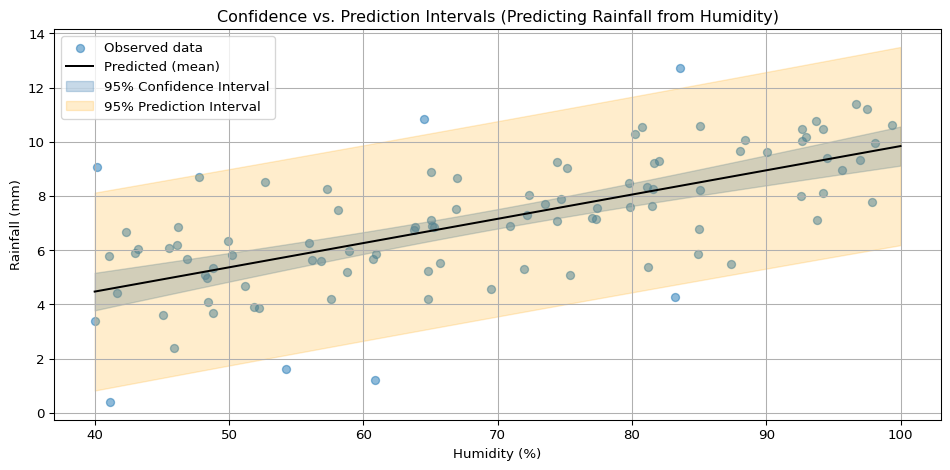

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Simulate data: rainfall increases with humidity with some noise
np.random.seed(1)
humidity = np.random.uniform(40, 100, 100)
rainfall = 0.1 * humidity + np.random.normal(0, 2, size=100)

# Fit linear model
X = sm.add_constant(humidity)
model = sm.OLS(rainfall, X).fit()

# Generate prediction range
humidity_pred = np.linspace(40, 100, 100)
X_pred = sm.add_constant(humidity_pred)
preds = model.get_prediction(X_pred).summary_frame(alpha=0.05)

# Plot
plt.figure(figsize=(10, 5))
plt.scatter(humidity, rainfall, alpha=0.5, label="Observed data")
plt.plot(humidity_pred, preds["mean"], color="black", label="Predicted (mean)")
plt.fill_between(humidity_pred, preds["mean_ci_lower"], preds["mean_ci_upper"],
                 color="steelblue", alpha=0.3, label="95% Confidence Interval")
plt.fill_between(humidity_pred, preds["obs_ci_lower"], preds["obs_ci_upper"],
                 color="orange", alpha=0.2, label="95% Prediction Interval")

plt.xlabel("Humidity (%)")
plt.ylabel("Rainfall (mm)")
plt.title("Confidence vs. Prediction Intervals (Predicting Rainfall from Humidity)")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()